# 1.NSCLC Sex-stratified SC Analysis

## Data selection, pseudobulk, create input for DESEQ2

alternating between enviroment scanpy for visualization and nsclc_gender_atlas for sccoda because in this last env sccoda.viz and sccoda.dat do not work anymore 

In [1]:
import scanpy as sc

In [2]:
import warnings
import numpy as np
import pandas as pd 
import scanpy as sc
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [3]:
import importlib
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from statannotations.Annotator import Annotator

In [6]:
from scipy.stats import wilcoxon

In [7]:
path = "/data/projects/2023/LCBiome/nsclc_gender_atlas_tmp/out/011_analysis_paired_remove_xy/pseudobulk/"
resDir = "/data/projects/2023/LCBiome/nsclc_gender_atlas_tmp/out/011_analysis_paired_remove_xy/figures/"
input_path = f"{path}/paired_adata_clean.h5ad"

In [8]:
adata = sc.read_h5ad(input_path) 

## There are malignant cells in normal_adjacent samples
Comming from 59 different patients and 14 datasets
I cannot give an explanation for this so i remove this "mislalbeled" cells 

In [9]:
grouped = adata.obs.groupby(['cell_type', 'origin']).size().reset_index(name='cell_count')

In [10]:
grouped

,cell_type,origin,cell_count
0,epithelial cell,normal_adjacent,5532
1,epithelial cell,tumor_primary,17420
2,macrophage,normal_adjacent,82361
3,macrophage,tumor_primary,48086
4,B cell,normal_adjacent,4121
5,B cell,tumor_primary,23779
6,dendritic cell,normal_adjacent,446
7,dendritic cell,tumor_primary,712
8,CD4+ T cell,normal_adjacent,57758
9,CD4+ T cell,tumor_primary,62899


In [11]:
# Create a Boolean mask for the cells that you want to keep
mask = ~((adata.obs['origin'] == 'normal_adjacent') & (adata.obs['cell_type'] == 'malignant cell'))

# Subset the adata object using the mask to exclude the specific cells
adata = adata[mask].copy()

# Now `adata_filtered` contains all cells except those with origin == 'normal_adjacent' and cell_type == 'malignant cell'


In [12]:
grouped = adata.obs.groupby(['cell_type', 'origin']).size().reset_index(name='cell_count')
grouped

,cell_type,origin,cell_count
0,epithelial cell,normal_adjacent,5532
1,epithelial cell,tumor_primary,17420
2,macrophage,normal_adjacent,82361
3,macrophage,tumor_primary,48086
4,B cell,normal_adjacent,4121
5,B cell,tumor_primary,23779
6,dendritic cell,normal_adjacent,446
7,dendritic cell,tumor_primary,712
8,CD4+ T cell,normal_adjacent,57758
9,CD4+ T cell,tumor_primary,62899


In [13]:
adata_normal = adata[adata.obs["origin"]=="normal_adjacent"]
#adata_normal = adata_normal[~adata_normal.obs["cell_type"].isin(["malignant cell"])]

In [14]:
set(adata_normal.obs.cell_type)

{'B cell',
 'CD4+ T cell',
 'CD8+ T cell',
 'dendritic cell',
 'epithelial cell',
 'macrophage',
 'neutrophil',
 'regulatory T cell'}

In [15]:
adata_tumor = adata[adata.obs["origin"]=="tumor_primary"]

In [16]:
set(adata_normal.obs.cell_type)

{'B cell',
 'CD4+ T cell',
 'CD8+ T cell',
 'dendritic cell',
 'epithelial cell',
 'macrophage',
 'neutrophil',
 'regulatory T cell'}

In [17]:
adata_normal = adata[adata.obs["origin"]=="normal_adjacent"]
#adata_normal = adata_normal[~adata_normal.obs["cell_type"].isin(["malignant cell"])]

In [18]:
adata_tumor = adata[adata.obs["origin"]=="tumor_primary"]

## Plotting

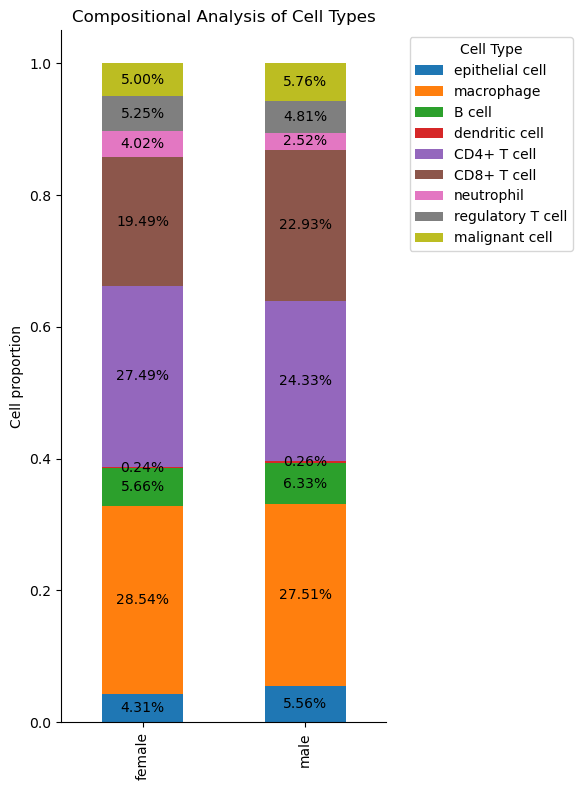

In [19]:
cell_type_counts = adata.obs.groupby(['sex', 'cell_type']).size().unstack(fill_value=0)
cell_type_proportions = cell_type_counts.div(cell_type_counts.sum(axis=1), axis=0)

ax = cell_type_proportions.plot(kind='bar', stacked=True, figsize=(6, 8))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Annotating percentages
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.2%}', ha='center', va='center')


# Add labels and title
plt.xlabel('')
plt.ylabel('Cell proportion')
plt.title('Compositional Analysis of Cell Types')
plt.legend(title='Cell Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


# Save the plot
plt.savefig(f'{resDir}/stacked_barplot_cell_type.png', bbox_inches='tight')

# Show the plot
plt.show()


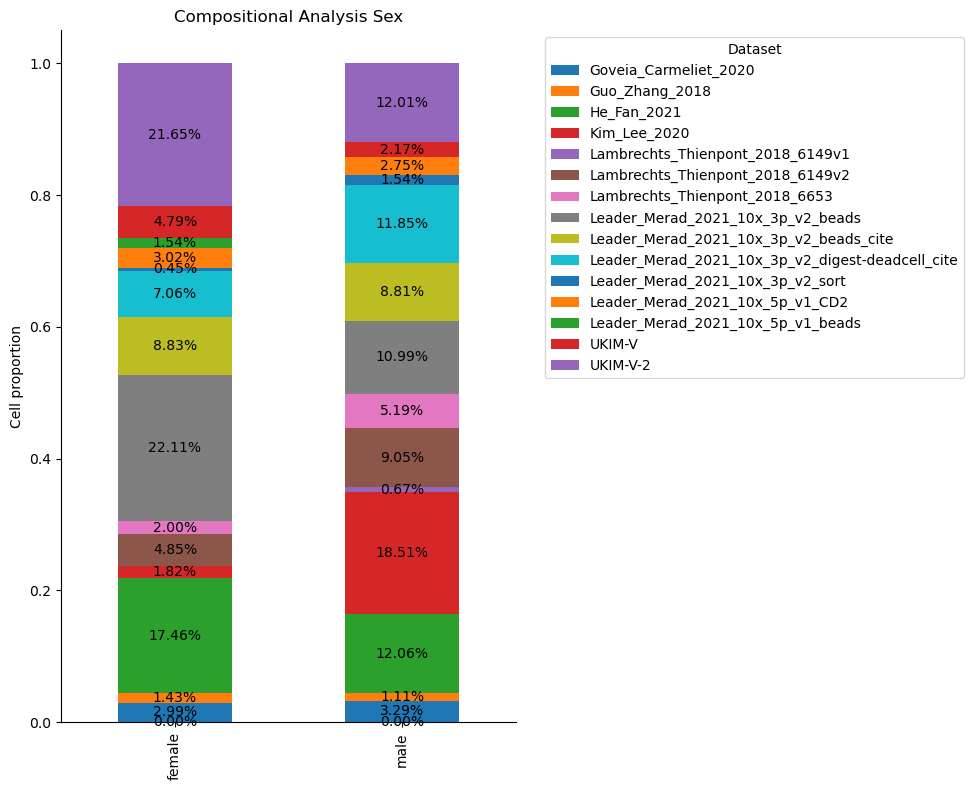

In [20]:
cell_type_counts = adata.obs.groupby(['sex', 'dataset']).size().unstack(fill_value=0)
cell_type_proportions = cell_type_counts.div(cell_type_counts.sum(axis=1), axis=0)

ax = cell_type_proportions.plot(kind='bar', stacked=True, figsize=(10, 8))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Annotating percentages
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.2%}', ha='center', va='center')


# Add labels and title
plt.xlabel('')
plt.ylabel('Cell proportion')
plt.title('Compositional Analysis Sex')
plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


# Save the plot
plt.savefig(f'{resDir}/stacked_barplot_dataset_sex.png', bbox_inches='tight')

# Show the plot
plt.show()


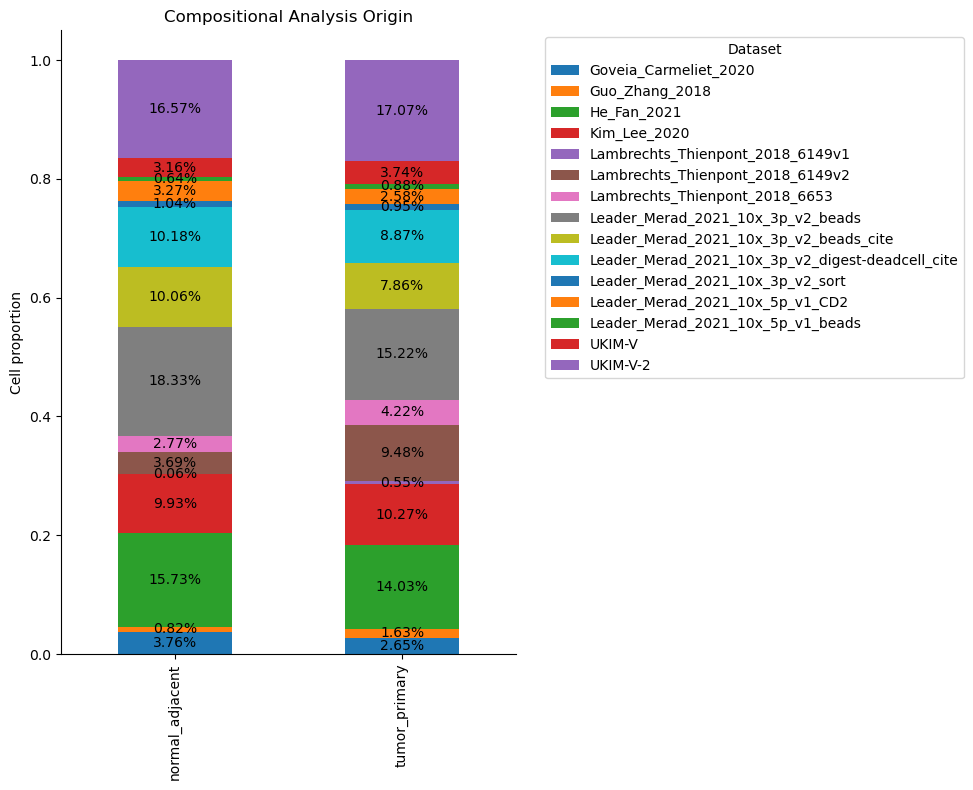

In [21]:
cell_type_counts = adata.obs.groupby(['origin', 'dataset']).size().unstack(fill_value=0)
cell_type_proportions = cell_type_counts.div(cell_type_counts.sum(axis=1), axis=0)

ax = cell_type_proportions.plot(kind='bar', stacked=True, figsize=(10, 8))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Annotating percentages
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.2%}', ha='center', va='center')


# Add labels and title
plt.xlabel('')
plt.ylabel('Cell proportion')
plt.title('Compositional Analysis Origin')
plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


# Save the plot
plt.savefig(f'{resDir}/stacked_barplot_origin_dataset.png', bbox_inches='tight')

# Show the plot
plt.show()


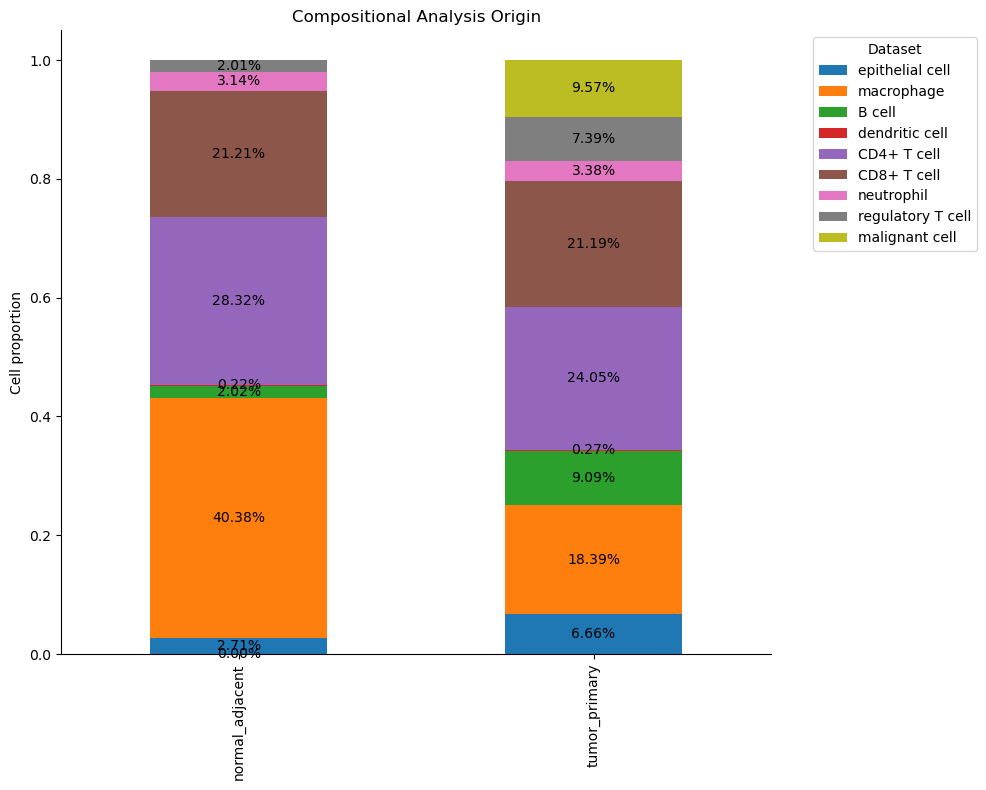

In [22]:
cell_type_counts = adata.obs.groupby(['origin', 'cell_type']).size().unstack(fill_value=0)
cell_type_proportions = cell_type_counts.div(cell_type_counts.sum(axis=1), axis=0)

ax = cell_type_proportions.plot(kind='bar', stacked=True, figsize=(10, 8))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Annotating percentages
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.2%}', ha='center', va='center')


# Add labels and title
plt.xlabel('')
plt.ylabel('Cell proportion')
plt.title('Compositional Analysis Origin')
plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


# Save the plot
plt.savefig(f'{resDir}/stacked_barplot_origin_cell_type.png', bbox_inches='tight')

# Show the plot
plt.show()


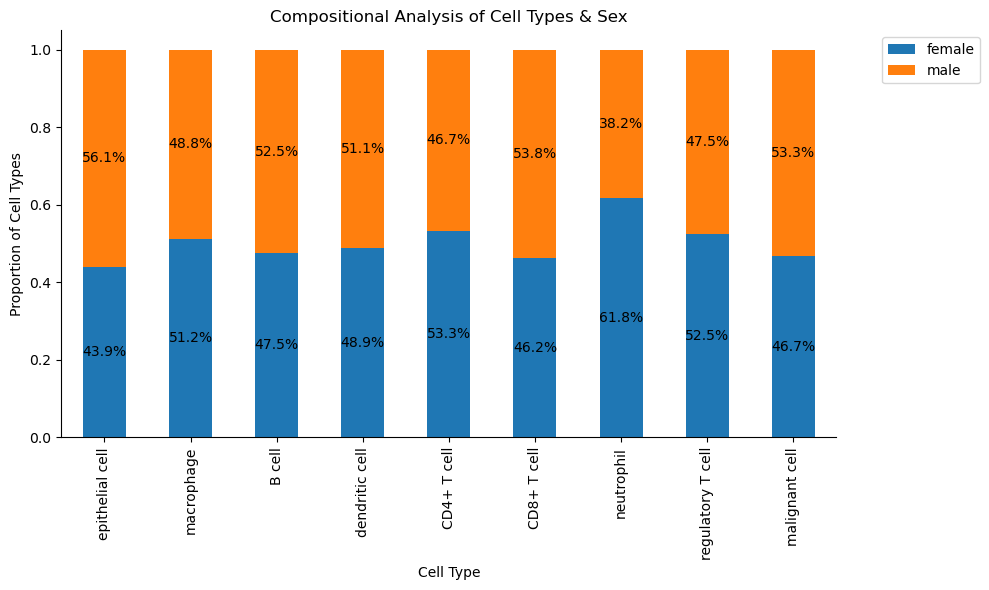

In [23]:
cell_type_counts = adata.obs.groupby(['cell_type', 'sex']).size().unstack(fill_value=0)
cell_type_proportions = cell_type_counts.div(cell_type_counts.sum(axis=1), axis=0)
ax = cell_type_proportions.plot(kind='bar', stacked=True, figsize=(10, 6))

# Annotating percentages
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1%}', ha='center', va='center')

# Remove the plot frame (all spines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['left'].set_visible(False)
#ax.spines['bottom'].set_visible(False)

# Add labels and title
plt.xlabel('Cell Type')
plt.ylabel('Proportion of Cell Types')
plt.title('Compositional Analysis of Cell Types & Sex')
plt.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the plot
plt.savefig(f'{resDir}/stacked_barplot_cell_type_sex.png', bbox_inches='tight')
# Show the plot
plt.show()


In [24]:
cell_type_counts

sex,female,male
cell_type,,
epithelial cell,10084,12868
macrophage,66764,63683
B cell,13247,14653
dendritic cell,566,592
CD4+ T cell,64319,56338
CD8+ T cell,45587,53085
neutrophil,9414,5830
regulatory T cell,12285,11126
malignant cell,11687,13346


In [25]:
cell_type_proportions

sex,female,male
cell_type,,
epithelial cell,0.439352,0.560648
macrophage,0.511809,0.488191
B cell,0.474803,0.525197
dendritic cell,0.488774,0.511226
CD4+ T cell,0.533073,0.466927
CD8+ T cell,0.462005,0.537995
neutrophil,0.617554,0.382446
regulatory T cell,0.524753,0.475247
malignant cell,0.466864,0.533136


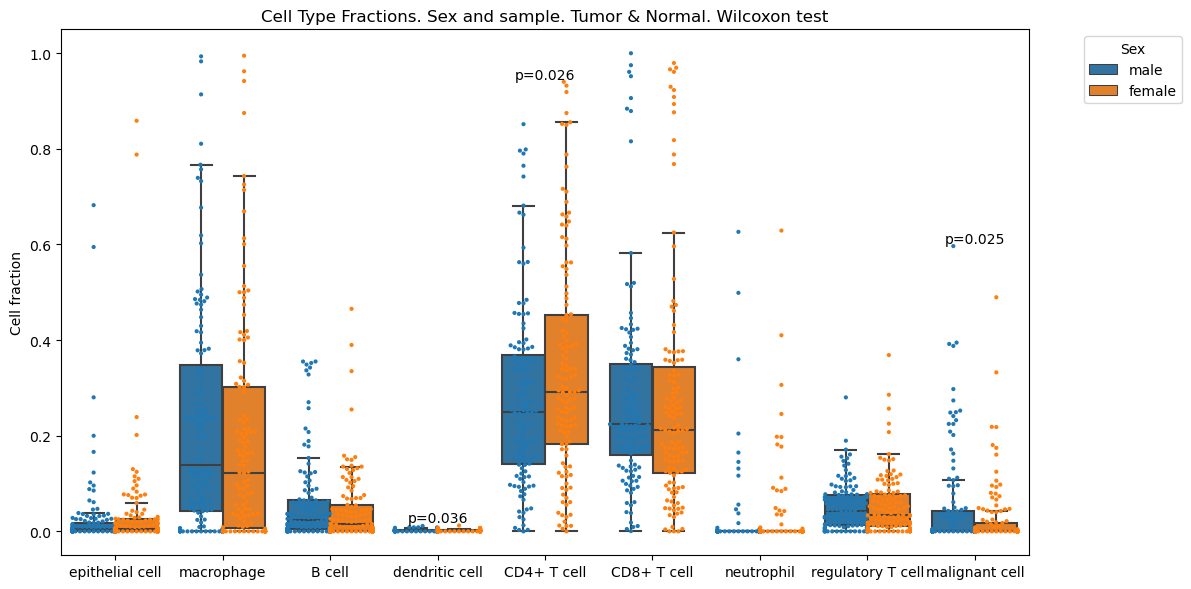

In [26]:
data = adata.obs[['sex', 'cell_type', 'sample']]
total_cells_by_sex_donor = data.groupby(['sex', 'sample']).size()

cell_type_fractions = data.groupby(['sex', 'sample', 'cell_type']).size().reset_index(name='count')
cell_type_fractions['fraction'] = cell_type_fractions.apply(
    lambda row: row['count'] / total_cells_by_sex_donor[(row['sex'], row['sample'])], axis=1
)

plt.figure(figsize=(12, 6))

# Create the boxplot
boxplot = sns.boxplot(x='cell_type', y='fraction', hue='sex', data=cell_type_fractions, showfliers=False, hue_order=["male", "female"])

# Overlay the swarmplot
swarmplot = sns.swarmplot(x='cell_type', y='fraction', hue='sex', data=cell_type_fractions, size=3, hue_order=["male", "female"], dodge=True)

# Step 3: Perform wilcoxonTest for significance and display p-values
significance_level = 0.05  

cell_types = cell_type_fractions['cell_type'].unique()


for cell_type in cell_types:
    male_fractions = cell_type_fractions[(cell_type_fractions['cell_type'] == cell_type) & (cell_type_fractions['sex'] == 'male')]['fraction'].dropna()
    female_fractions = cell_type_fractions[(cell_type_fractions['cell_type'] == cell_type) & (cell_type_fractions['sex'] == 'female')]['fraction'].dropna()

    # Ensure the lengths are equal by truncating the longer list
    min_length = min(len(male_fractions), len(female_fractions))
    male_fractions = male_fractions[:min_length]
    female_fractions = female_fractions[:min_length]
    
    # Perform wilcoxon Test
    stat, p_value = wilcoxon(male_fractions, female_fractions)
        
    if p_value < significance_level:
        x_position = list(cell_types).index(cell_type)
        y_max = cell_type_fractions[cell_type_fractions['cell_type'] == cell_type]['fraction'].max()
        plt.text(x_position, y_max, f'p={p_value:.3f}', ha='center', va='bottom', color='black', fontsize=10)

# Step 4: Remove duplicate legends
handles, labels = boxplot.get_legend_handles_labels()
plt.legend().remove()

# Add a single legend using the collected handles and labels
plt.legend(handles=handles[:2], labels=labels[:2], title="Sex", bbox_to_anchor=(1.05, 1), loc='upper left')

# Customize the plot
plt.xlabel('')
plt.ylabel('Cell fraction')
plt.title('Cell Type Fractions. Sex and sample. Tumor & Normal. Wilcoxon test')

# Adjust layout
plt.tight_layout()

plt.savefig(f'{resDir}/stacked_barplot_swarm_willcoxon_tn.png', bbox_inches='tight')
# Show the plot
plt.show()


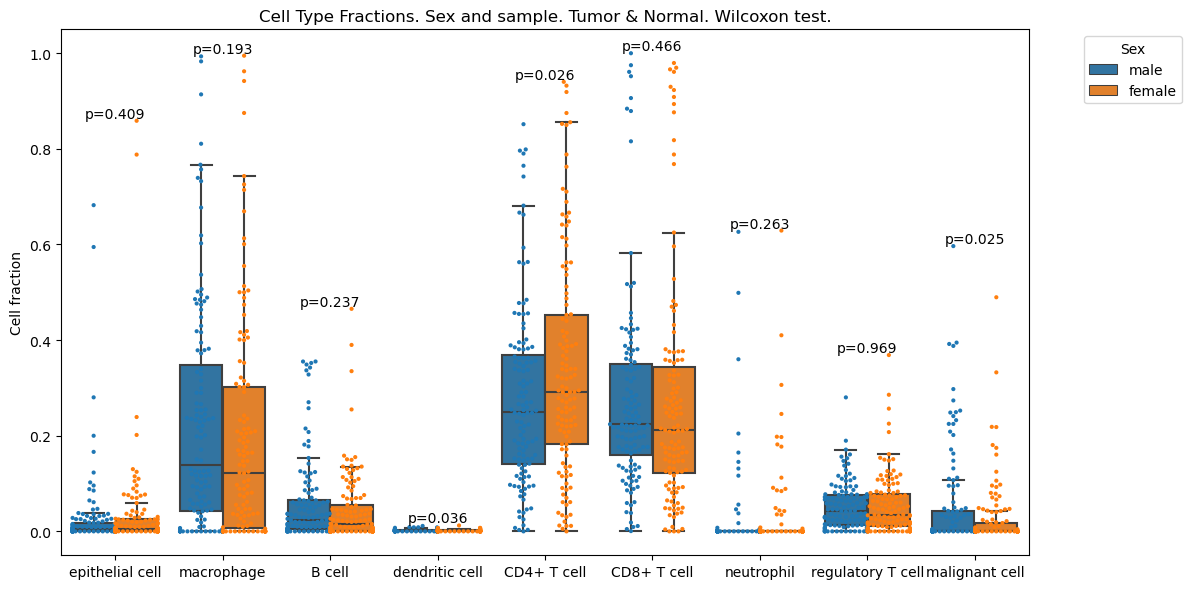

In [27]:
data = adata.obs[['sex', 'cell_type', 'sample']]
total_cells_by_sex_donor = data.groupby(['sex', 'sample']).size()

cell_type_fractions = data.groupby(['sex', 'sample', 'cell_type']).size().reset_index(name='count')
cell_type_fractions['fraction'] = cell_type_fractions.apply(
    lambda row: row['count'] / total_cells_by_sex_donor[(row['sex'], row['sample'])], axis=1
)

plt.figure(figsize=(12, 6))

# Create the boxplot
boxplot = sns.boxplot(x='cell_type', y='fraction', hue='sex', data=cell_type_fractions, showfliers=False, hue_order=["male", "female"])

# Overlay the swarmplot
vswarmplot = sns.swarmplot(x='cell_type', y='fraction', hue='sex', data=cell_type_fractions, size=3, hue_order=["male", "female"], dodge=True)

# Step 3: Perform wilcoxonTest for significance and display p-values
significance_level = 0.05  

cell_types = cell_type_fractions['cell_type'].unique()


for cell_type in cell_types:
    male_fractions = cell_type_fractions[(cell_type_fractions['cell_type'] == cell_type) & (cell_type_fractions['sex'] == 'male')]['fraction'].dropna()
    female_fractions = cell_type_fractions[(cell_type_fractions['cell_type'] == cell_type) & (cell_type_fractions['sex'] == 'female')]['fraction'].dropna()

    # Ensure the lengths are equal by truncating the longer list
    min_length = min(len(male_fractions), len(female_fractions))
    male_fractions = male_fractions[:min_length]
    female_fractions = female_fractions[:min_length]
    
    # Perform wilcoxon Test
    stat, p_value = wilcoxon(male_fractions, female_fractions)
        
    #if p_value < significance_level:
    x_position = list(cell_types).index(cell_type)
    y_max = cell_type_fractions[cell_type_fractions['cell_type'] == cell_type]['fraction'].max()
    plt.text(x_position, y_max, f'p={p_value:.3f}', ha='center', va='bottom', color='black', fontsize=10)

# Step 4: Remove duplicate legends
handles, labels = boxplot.get_legend_handles_labels()
plt.legend().remove()

# Add a single legend using the collected handles and labels
plt.legend(handles=handles[:2], labels=labels[:2], title="Sex", bbox_to_anchor=(1.05, 1), loc='upper left')

# Customize the plot
plt.xlabel('')
plt.ylabel('Cell fraction')
plt.title('Cell Type Fractions. Sex and sample. Tumor & Normal. Wilcoxon test.')

# Adjust layout
plt.tight_layout()

plt.savefig(f'{resDir}/stacked_barplot_swarm_willcoxon_tn_allpvalues.png', bbox_inches='tight')
# Show the plot
plt.show()


## TUMOR

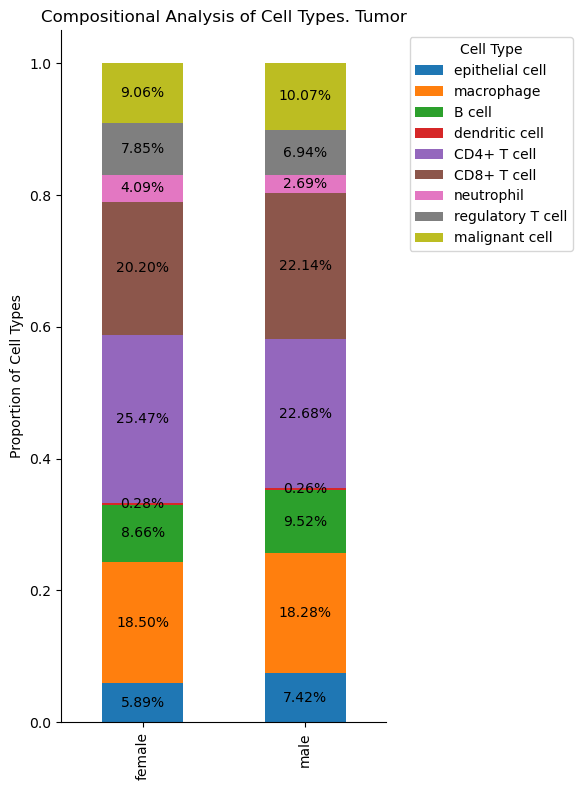

In [28]:
cell_type_counts = adata[adata.obs["origin"]=="tumor_primary"].obs.groupby(['sex', 'cell_type']).size().unstack(fill_value=0)
cell_type_proportions = cell_type_counts.div(cell_type_counts.sum(axis=1), axis=0)

ax = cell_type_proportions.plot(kind='bar', stacked=True, figsize=(6, 8))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Annotating percentages
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.2%}', ha='center', va='center')


# Add labels and title
plt.xlabel('')
plt.ylabel('Proportion of Cell Types')
plt.title('Compositional Analysis of Cell Types. Tumor')
plt.legend(title='Cell Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


# Save the plot
plt.savefig(f'{resDir}/stacked_barplot_cell_type_tumor.png', bbox_inches='tight')

# Show the plot
plt.show()


In [29]:
len(adata.obs)

465474

In [30]:
adata.obs.origin.value_counts()

tumor_primary      261494
normal_adjacent    203980
Name: origin, dtype: int64

In [31]:
cell_type_counts

cell_type,epithelial cell,macrophage,B cell,dendritic cell,CD4+ T cell,CD8+ T cell,neutrophil,regulatory T cell,malignant cell
sex,,,,,,,,,
female,7594,23869,11172,363,32857,26066,5282,10131,11687
male,9826,24217,12607,349,30042,29333,3563,9190,13346


In [32]:
cell_type_proportions

cell_type,epithelial cell,macrophage,B cell,dendritic cell,CD4+ T cell,CD8+ T cell,neutrophil,regulatory T cell,malignant cell
sex,,,,,,,,,
female,0.058859,0.185001,0.086591,0.002813,0.254664,0.202029,0.040939,0.078522,0.090582
male,0.074174,0.182807,0.095167,0.002634,0.226778,0.221426,0.026896,0.069373,0.100745


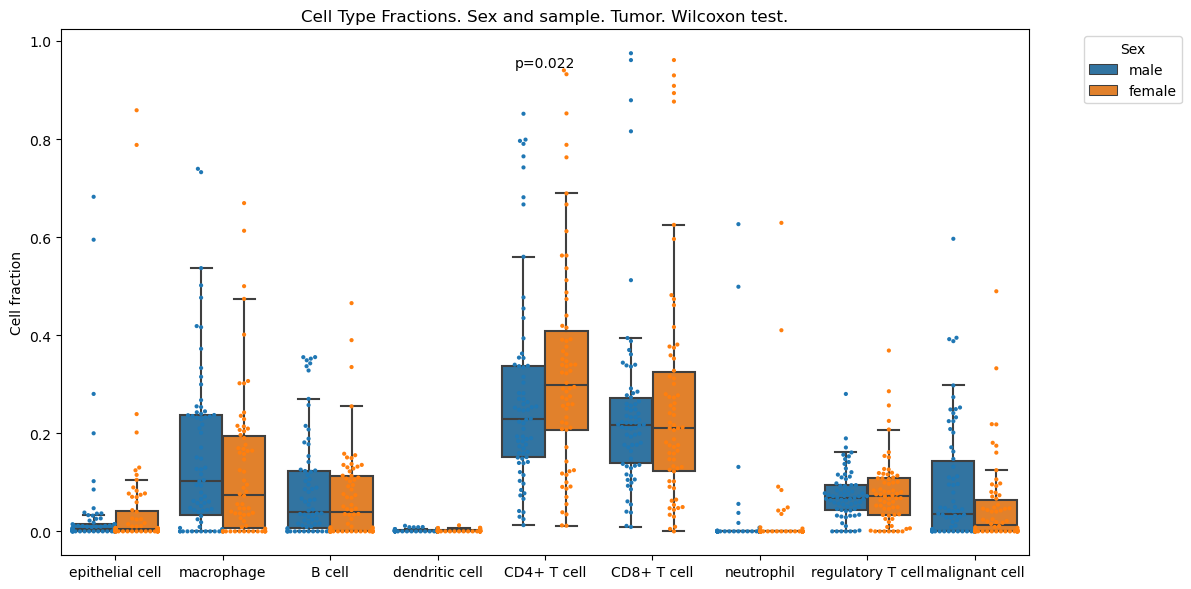

In [33]:
data = adata_tumor.obs[['sex', 'cell_type', 'sample']]

# Step 1: Calculate the cell type proportions for each sex and donor
total_cells_by_sex_donor = data.groupby(['sex', 'sample']).size()

cell_type_fractions = data.groupby(['sex', 'sample', 'cell_type']).size().reset_index(name='count')
cell_type_fractions['fraction'] = cell_type_fractions.apply(
    lambda row: row['count'] / total_cells_by_sex_donor[(row['sex'], row['sample'])], axis=1
)

# Step 2: Create the boxplot and swarmplot
plt.figure(figsize=(12, 6))

# Create the boxplot
boxplot = sns.boxplot(x='cell_type', y='fraction', hue='sex', data=cell_type_fractions, showfliers=False, hue_order=["male", "female"])

# Overlay the swarmplot
swarmplot = sns.swarmplot(x='cell_type', y='fraction', hue='sex', data=cell_type_fractions, size=3, hue_order=["male", "female"], dodge=True)

# Step 3: Perform Mann-Whitney U Test for significance and display p-values
significance_level = 0.05  

cell_types = cell_type_fractions['cell_type'].unique()


for cell_type in cell_types:
    male_fractions = cell_type_fractions[(cell_type_fractions['cell_type'] == cell_type) & (cell_type_fractions['sex'] == 'male')]['fraction'].dropna()
    female_fractions = cell_type_fractions[(cell_type_fractions['cell_type'] == cell_type) & (cell_type_fractions['sex'] == 'female')]['fraction'].dropna()

    # Ensure the lengths are equal by truncating the longer list
    min_length = min(len(male_fractions), len(female_fractions))
    male_fractions = male_fractions[:min_length]
    female_fractions = female_fractions[:min_length]
    
    # Perform wilcoxon Test
    stat, p_value = wilcoxon(male_fractions, female_fractions)
        
    if p_value < significance_level:
        x_position = list(cell_types).index(cell_type)
        y_max = cell_type_fractions[cell_type_fractions['cell_type'] == cell_type]['fraction'].max()
        plt.text(x_position, y_max, f'p={p_value:.3f}', ha='center', va='bottom', color='black', fontsize=10)

# Step 4: Remove duplicate legends
handles, labels = boxplot.get_legend_handles_labels()
plt.legend().remove()

# Add a single legend using the collected handles and labels
plt.legend(handles=handles[:2], labels=labels[:2], title="Sex", bbox_to_anchor=(1.05, 1), loc='upper left')

# Customize the plot
plt.xlabel('')
plt.ylabel('Cell fraction')
plt.title('Cell Type Fractions. Sex and sample. Tumor. Wilcoxon test.')

# Adjust layout
plt.tight_layout()

plt.savefig(f'{resDir}/stacked_barplot_swarm_willcoxon_t.png', bbox_inches='tight')

# Show the plot
plt.show()


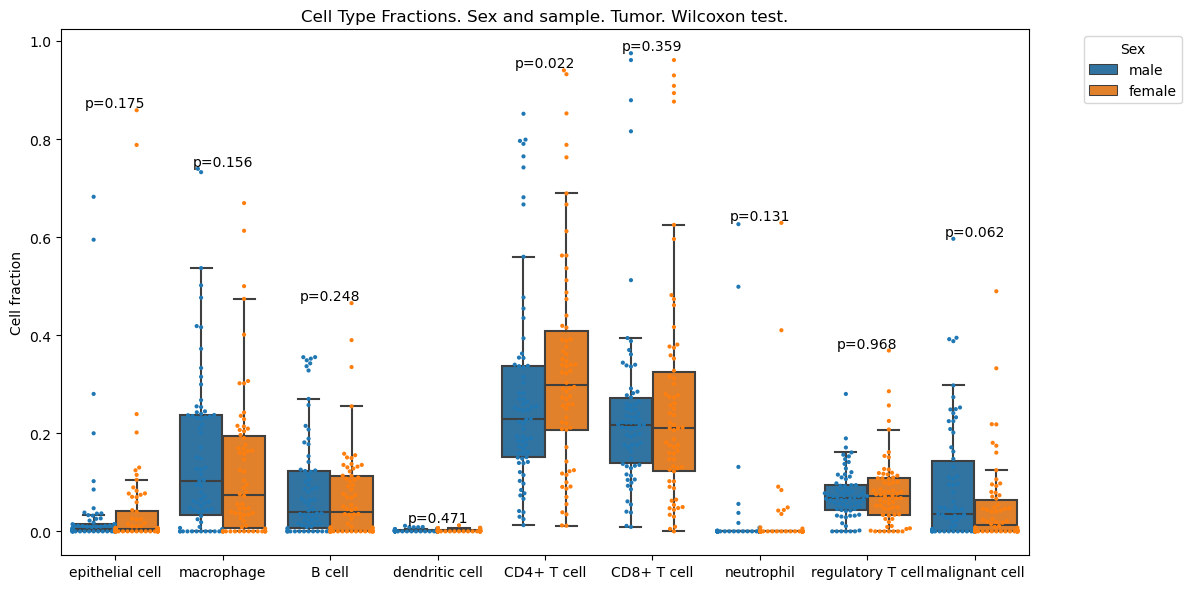

In [34]:
data = adata_tumor.obs[['sex', 'cell_type', 'sample']]

# Step 1: Calculate the cell type proportions for each sex and donor
total_cells_by_sex_donor = data.groupby(['sex', 'sample']).size()

cell_type_fractions = data.groupby(['sex', 'sample', 'cell_type']).size().reset_index(name='count')
cell_type_fractions['fraction'] = cell_type_fractions.apply(
    lambda row: row['count'] / total_cells_by_sex_donor[(row['sex'], row['sample'])], axis=1
)

# Step 2: Create the boxplot and swarmplot
plt.figure(figsize=(12, 6))

# Create the boxplot
boxplot = sns.boxplot(x='cell_type', y='fraction', hue='sex', data=cell_type_fractions, showfliers=False, hue_order=["male", "female"])

# Overlay the swarmplot
swarmplot = sns.swarmplot(x='cell_type', y='fraction', hue='sex', data=cell_type_fractions, size=3, hue_order=["male", "female"], dodge=True)

# Step 3: Perform Mann-Whitney U Test for significance and display p-values
significance_level = 0.05  

cell_types = cell_type_fractions['cell_type'].unique()


for cell_type in cell_types:
    male_fractions = cell_type_fractions[(cell_type_fractions['cell_type'] == cell_type) & (cell_type_fractions['sex'] == 'male')]['fraction'].dropna()
    female_fractions = cell_type_fractions[(cell_type_fractions['cell_type'] == cell_type) & (cell_type_fractions['sex'] == 'female')]['fraction'].dropna()

    # Ensure the lengths are equal by truncating the longer list
    min_length = min(len(male_fractions), len(female_fractions))
    male_fractions = male_fractions[:min_length]
    female_fractions = female_fractions[:min_length]
    
    # Perform wilcoxon Test
    stat, p_value = wilcoxon(male_fractions, female_fractions)
        
    #if p_value < significance_level:
    x_position = list(cell_types).index(cell_type)
    y_max = cell_type_fractions[cell_type_fractions['cell_type'] == cell_type]['fraction'].max()
    plt.text(x_position, y_max, f'p={p_value:.3f}', ha='center', va='bottom', color='black', fontsize=10)

# Step 4: Remove duplicate legends
handles, labels = boxplot.get_legend_handles_labels()
plt.legend().remove()

# Add a single legend using the collected handles and labels
plt.legend(handles=handles[:2], labels=labels[:2], title="Sex", bbox_to_anchor=(1.05, 1), loc='upper left')

# Customize the plot
plt.xlabel('')
plt.ylabel('Cell fraction')
plt.title('Cell Type Fractions. Sex and sample. Tumor. Wilcoxon test.')

# Adjust layout
plt.tight_layout()

plt.savefig(f'{resDir}/stacked_barplot_swarm_willcoxon_t_allpvalues.png', bbox_inches='tight')

# Show the plot
plt.show()


## NORMAL

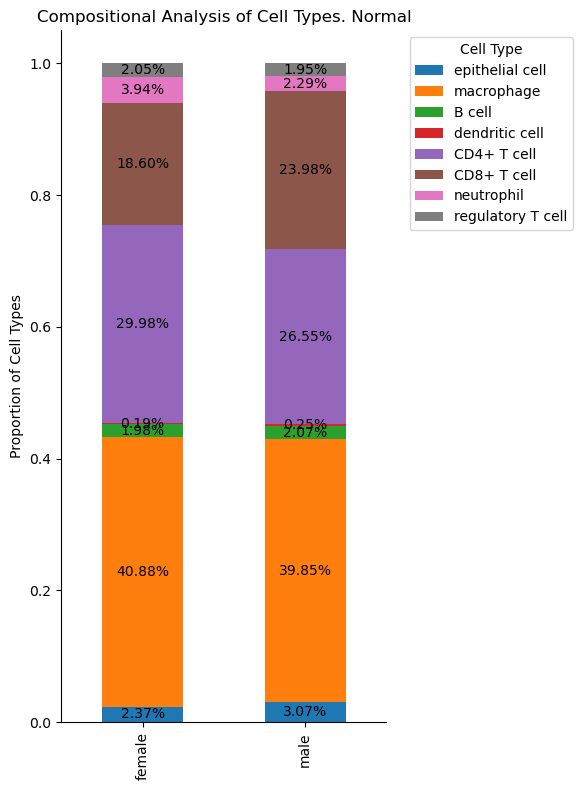

In [35]:
cell_type_counts = adata_normal.obs.groupby(['sex', 'cell_type']).size().unstack(fill_value=0)
cell_type_proportions = cell_type_counts.div(cell_type_counts.sum(axis=1), axis=0)

ax = cell_type_proportions.plot(kind='bar', stacked=True, figsize=(6, 8))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Annotating percentages
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.2%}', ha='center', va='center')


# Add labels and title
plt.xlabel('')
plt.ylabel('Proportion of Cell Types')
plt.title('Compositional Analysis of Cell Types. Normal')
plt.legend(title='Cell Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


# Save the plot
plt.savefig(f'{resDir}/stacked_barplot_cell_type_normal.png', bbox_inches='tight')

# Show the plot
plt.show()


In [36]:
cell_type_counts

cell_type,epithelial cell,macrophage,B cell,dendritic cell,CD4+ T cell,CD8+ T cell,neutrophil,regulatory T cell
sex,,,,,,,,
female,2490,42895,2075,203,31462,19521,4132,2154
male,3042,39466,2046,243,26296,23752,2267,1936


In [37]:
cell_type_proportions

cell_type,epithelial cell,macrophage,B cell,dendritic cell,CD4+ T cell,CD8+ T cell,neutrophil,regulatory T cell
sex,,,,,,,,
female,0.023730,0.408789,0.019775,0.001935,0.299832,0.186035,0.039378,0.020528
male,0.030712,0.398453,0.020657,0.002453,0.265487,0.239803,0.022888,0.019546


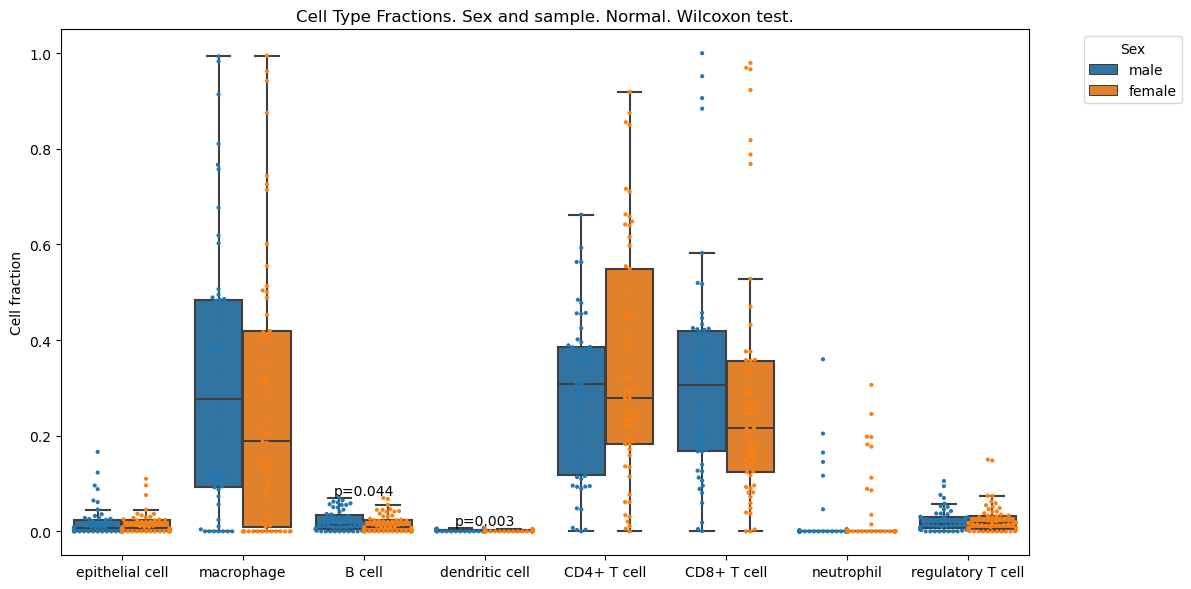

In [38]:
# Assuming 'sex', 'cell_type', and 'donor_id' are columns in your dataset (adata.obs in your case)
data = adata_normal.obs[['sex', 'cell_type', 'sample']]

# Step 1: Calculate the cell type proportions for each sex and donor
total_cells_by_sex_donor = data.groupby(['sex', 'sample']).size()

cell_type_fractions = data.groupby(['sex', 'sample', 'cell_type']).size().reset_index(name='count')
cell_type_fractions['fraction'] = cell_type_fractions.apply(
    lambda row: row['count'] / total_cells_by_sex_donor[(row['sex'], row['sample'])], axis=1
)

# Step 2: Create the boxplot and swarmplot
plt.figure(figsize=(12, 6))

# Create the boxplot
boxplot = sns.boxplot(x='cell_type', y='fraction', hue='sex', data=cell_type_fractions, showfliers=False, hue_order=["male", "female"])

# Overlay the swarmplot
swarmplot = sns.swarmplot(x='cell_type', y='fraction', hue='sex', data=cell_type_fractions, size=3, hue_order=["male", "female"], dodge=True)

# Step 3: Perform Mann-Whitney U Test for significance and display p-values
significance_level = 0.05  

cell_types = cell_type_fractions['cell_type'].unique()


for cell_type in cell_types:
    male_fractions = cell_type_fractions[(cell_type_fractions['cell_type'] == cell_type) & (cell_type_fractions['sex'] == 'male')]['fraction'].dropna()
    female_fractions = cell_type_fractions[(cell_type_fractions['cell_type'] == cell_type) & (cell_type_fractions['sex'] == 'female')]['fraction'].dropna()
          # Ensure the lengths are equal by truncating the longer list
    min_length = min(len(male_fractions), len(female_fractions))
    male_fractions = male_fractions[:min_length]
    female_fractions = female_fractions[:min_length]
    
    # Perform wilcoxon Test
    stat, p_value = wilcoxon(male_fractions, female_fractions)
    if p_value < significance_level:
        x_position = list(cell_types).index(cell_type)
        y_max = cell_type_fractions[cell_type_fractions['cell_type'] == cell_type]['fraction'].max()
        plt.text(x_position, y_max, f'p={p_value:.3f}', ha='center', va='bottom', color='black', fontsize=10)


# Step 4: Remove duplicate legends
handles, labels = boxplot.get_legend_handles_labels()
plt.legend().remove()

# Add a single legend using the collected handles and labels
plt.legend(handles=handles[:2], labels=labels[:2], title="Sex", bbox_to_anchor=(1.05, 1), loc='upper left')

# Customize the plot
plt.xlabel('')
plt.ylabel('Cell fraction')
plt.title('Cell Type Fractions. Sex and sample. Normal. Wilcoxon test.')

# Adjust layout
plt.tight_layout()


plt.savefig(f'{resDir}/stacked_barplot_swarm_willcoxon_n.png', bbox_inches='tight')

# Show the plot
plt.show()


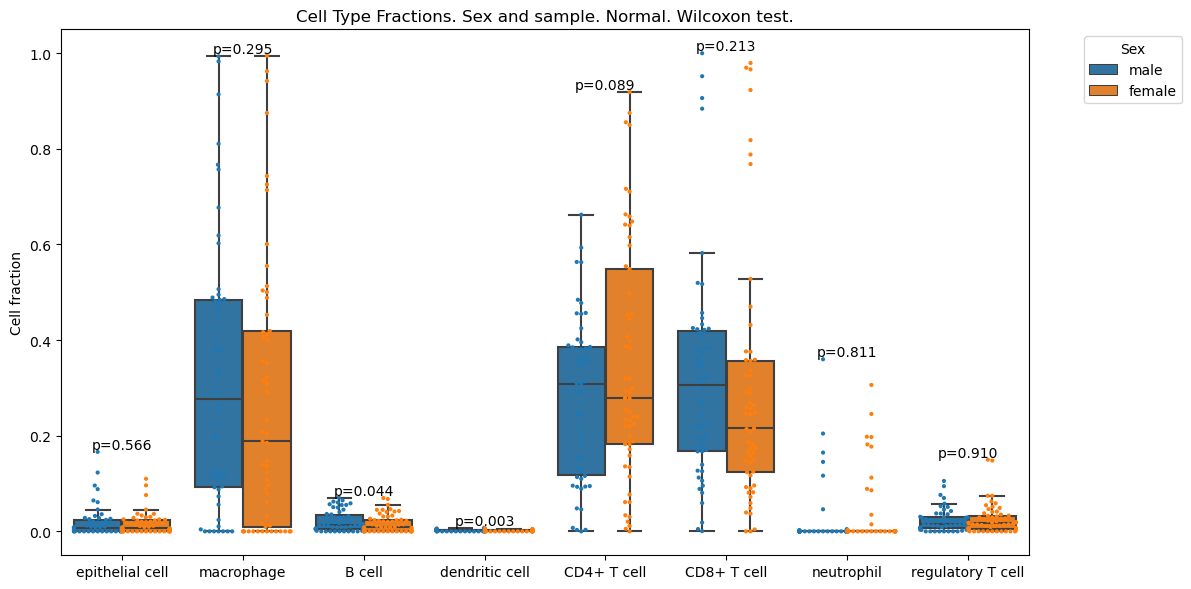

In [39]:
# Assuming 'sex', 'cell_type', and 'donor_id' are columns in your dataset (adata.obs in your case)
data = adata_normal.obs[['sex', 'cell_type', 'sample']]

# Step 1: Calculate the cell type proportions for each sex and donor
total_cells_by_sex_donor = data.groupby(['sex', 'sample']).size()

cell_type_fractions = data.groupby(['sex', 'sample', 'cell_type']).size().reset_index(name='count')
cell_type_fractions['fraction'] = cell_type_fractions.apply(
    lambda row: row['count'] / total_cells_by_sex_donor[(row['sex'], row['sample'])], axis=1
)

# Step 2: Create the boxplot and swarmplot
plt.figure(figsize=(12, 6))

# Create the boxplot
boxplot = sns.boxplot(x='cell_type', y='fraction', hue='sex', data=cell_type_fractions, showfliers=False, hue_order=["male", "female"])

# Overlay the swarmplot
swarmplot = sns.swarmplot(x='cell_type', y='fraction', hue='sex', data=cell_type_fractions, size=3, hue_order=["male", "female"], dodge=True)

# Step 3: Perform Mann-Whitney U Test for significance and display p-values
significance_level = 0.05  

cell_types = cell_type_fractions['cell_type'].unique()


for cell_type in cell_types:
    male_fractions = cell_type_fractions[(cell_type_fractions['cell_type'] == cell_type) & (cell_type_fractions['sex'] == 'male')]['fraction'].dropna()
    female_fractions = cell_type_fractions[(cell_type_fractions['cell_type'] == cell_type) & (cell_type_fractions['sex'] == 'female')]['fraction'].dropna()
          # Ensure the lengths are equal by truncating the longer list
    min_length = min(len(male_fractions), len(female_fractions))
    male_fractions = male_fractions[:min_length]
    female_fractions = female_fractions[:min_length]
    
    # Perform wilcoxon Test
    stat, p_value = wilcoxon(male_fractions, female_fractions)
    #if p_value < significance_level:
    x_position = list(cell_types).index(cell_type)
    y_max = cell_type_fractions[cell_type_fractions['cell_type'] == cell_type]['fraction'].max()
    plt.text(x_position, y_max, f'p={p_value:.3f}', ha='center', va='bottom', color='black', fontsize=10)




# Step 4: Remove duplicate legends
handles, labels = boxplot.get_legend_handles_labels()
plt.legend().remove()

# Add a single legend using the collected handles and labels
plt.legend(handles=handles[:2], labels=labels[:2], title="Sex", bbox_to_anchor=(1.05, 1), loc='upper left')

# Customize the plot
plt.xlabel('')
plt.ylabel('Cell fraction')
plt.title('Cell Type Fractions. Sex and sample. Normal. Wilcoxon test.')

# Adjust layout
plt.tight_layout()


plt.savefig(f'{resDir}/stacked_barplot_swarm_willcoxon_n_allpvalues.png', bbox_inches='tight')

# Show the plot
plt.show()


## FEMALE 

In [40]:
adata_female = adata[adata.obs["sex"]=="female"]

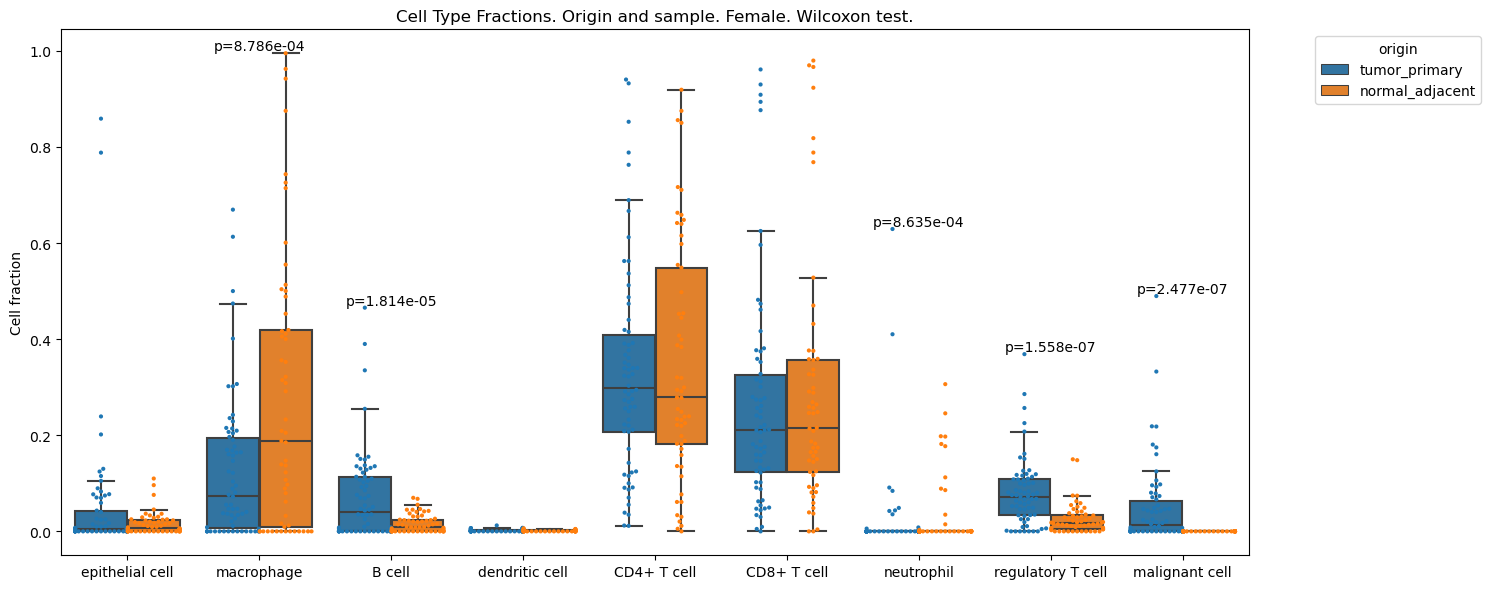

In [56]:
# Assuming 'sex', 'cell_type', and 'donor_id' are columns in your dataset (adata.obs in your case)
data = adata_female.obs[['origin', 'cell_type', 'sample']]

# Step 1: Calculate the cell type proportions for each sex and donor
total_cells_by_sex_donor = data.groupby(['origin', 'sample']).size()

cell_type_fractions = data.groupby(['origin', 'sample', 'cell_type']).size().reset_index(name='count')
cell_type_fractions['fraction'] = cell_type_fractions.apply(
    lambda row: row['count'] / total_cells_by_sex_donor[(row['origin'], row['sample'])], axis=1
)

# Step 2: Create the boxplot and swarmplot
plt.figure(figsize=(15, 6))

# Create the boxplot
boxplot = sns.boxplot(x='cell_type', y='fraction', hue='origin', data=cell_type_fractions, showfliers=False, hue_order=["tumor_primary", "normal_adjacent"])

# Overlay the swarmplot
swarmplot = sns.swarmplot(x='cell_type', y='fraction', hue='origin', data=cell_type_fractions, size=3, hue_order=["tumor_primary", "normal_adjacent"], dodge=True)

# Step 3: Perform Mann-Whitney U Test for significance and display p-values
significance_level = 0.05  

cell_types = cell_type_fractions['cell_type'].unique()


for cell_type in cell_types:
    male_fractions = cell_type_fractions[(cell_type_fractions['cell_type'] == cell_type) & (cell_type_fractions['origin'] == 'tumor_primary')]['fraction'].dropna()
    female_fractions = cell_type_fractions[(cell_type_fractions['cell_type'] == cell_type) & (cell_type_fractions['origin'] == 'normal_adjacent')]['fraction'].dropna()
          # Ensure the lengths are equal by truncating the longer list
    min_length = min(len(male_fractions), len(female_fractions))
    male_fractions = male_fractions[:min_length]
    female_fractions = female_fractions[:min_length]
    
    # Perform wilcoxon Test
    stat, p_value = wilcoxon(male_fractions, female_fractions)
    if p_value < significance_level:
        x_position = list(cell_types).index(cell_type)
        y_max = cell_type_fractions[cell_type_fractions['cell_type'] == cell_type]['fraction'].max()
        plt.text(x_position, y_max, f'p={p_value:.3e}', ha='center', va='bottom', color='black', fontsize=10)


# Step 4: Remove duplicate legends
handles, labels = boxplot.get_legend_handles_labels()
plt.legend().remove()

# Add a single legend using the collected handles and labels
plt.legend(handles=handles[:2], labels=labels[:2], title="origin", bbox_to_anchor=(1.05, 1), loc='upper left')

# Customize the plot
plt.xlabel('')
plt.ylabel('Cell fraction')
plt.title('Cell Type Fractions. Origin and sample. Female. Wilcoxon test.')

# Adjust layout
plt.tight_layout()


plt.savefig(f'{resDir}/stacked_barplot_swarm_willcoxon_female.png', bbox_inches='tight')

# Show the plot
plt.show()


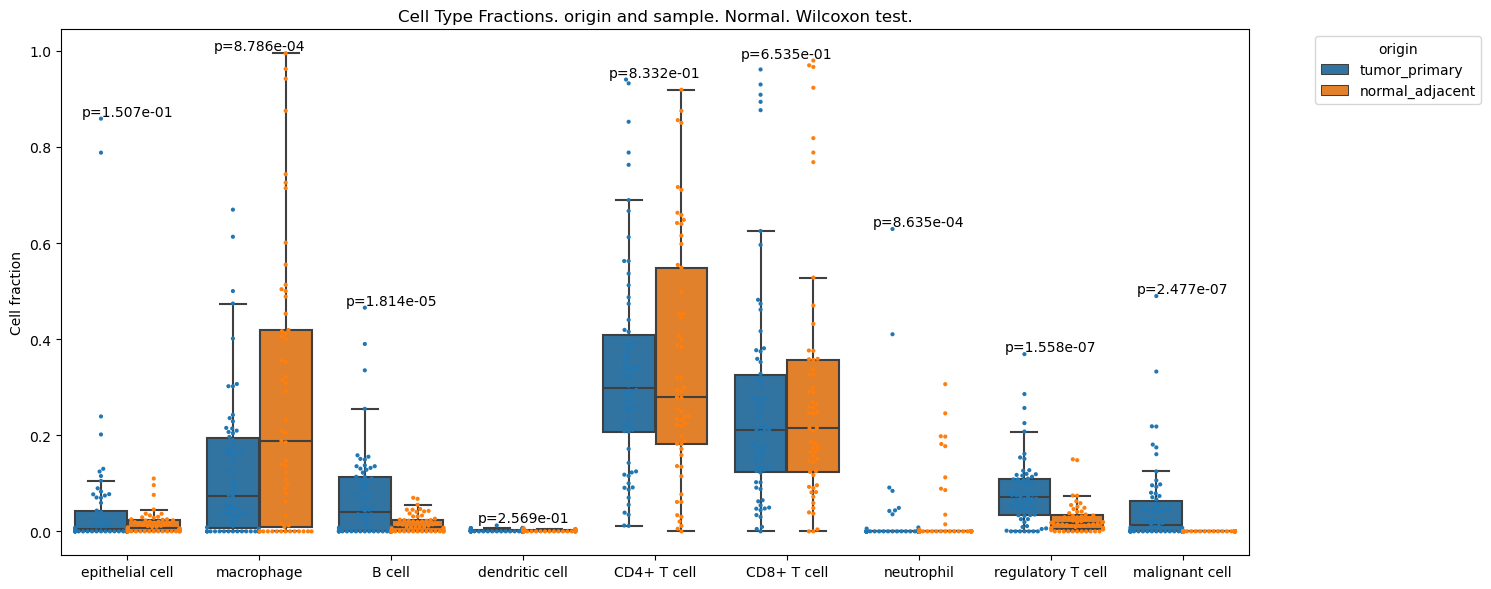

In [51]:
# Assuming 'sex', 'cell_type', and 'donor_id' are columns in your dataset (adata.obs in your case)
data = adata_female.obs[['origin', 'cell_type', 'sample']]

# Step 1: Calculate the cell type proportions for each sex and donor
total_cells_by_sex_donor = data.groupby(['origin', 'sample']).size()

cell_type_fractions = data.groupby(['origin', 'sample', 'cell_type']).size().reset_index(name='count')
cell_type_fractions['fraction'] = cell_type_fractions.apply(
    lambda row: row['count'] / total_cells_by_sex_donor[(row['origin'], row['sample'])], axis=1
)

# Step 2: Create the boxplot and swarmplot
plt.figure(figsize=(15, 6))

# Create the boxplot
boxplot = sns.boxplot(x='cell_type', y='fraction', hue='origin', data=cell_type_fractions, showfliers=False, hue_order=["tumor_primary", "normal_adjacent"])

# Overlay the swarmplot
swarmplot = sns.swarmplot(x='cell_type', y='fraction', hue='origin', data=cell_type_fractions, size=3, hue_order=["tumor_primary", "normal_adjacent"], dodge=True)

# Step 3: Perform Mann-Whitney U Test for significance and display p-values
significance_level = 0.05  

cell_types = cell_type_fractions['cell_type'].unique()


for cell_type in cell_types:
    male_fractions = cell_type_fractions[(cell_type_fractions['cell_type'] == cell_type) & (cell_type_fractions['origin'] == 'tumor_primary')]['fraction'].dropna()
    female_fractions = cell_type_fractions[(cell_type_fractions['cell_type'] == cell_type) & (cell_type_fractions['origin'] == 'normal_adjacent')]['fraction'].dropna()
          # Ensure the lengths are equal by truncating the longer list
    min_length = min(len(male_fractions), len(female_fractions))
    male_fractions = male_fractions[:min_length]
    female_fractions = female_fractions[:min_length]
    
    # Perform wilcoxon Test
    stat, p_value = wilcoxon(male_fractions, female_fractions)
    #if p_value < significance_level:
    x_position = list(cell_types).index(cell_type)
    y_max = cell_type_fractions[cell_type_fractions['cell_type'] == cell_type]['fraction'].max()
    plt.text(x_position, y_max, f'p={p_value:.3e}', ha='center', va='bottom', color='black', fontsize=10)


# Step 4: Remove duplicate legends
handles, labels = boxplot.get_legend_handles_labels()
plt.legend().remove()

# Add a single legend using the collected handles and labels
plt.legend(handles=handles[:2], labels=labels[:2], title="origin", bbox_to_anchor=(1.05, 1), loc='upper left')

# Customize the plot
plt.xlabel('')
plt.ylabel('Cell fraction')
plt.title('Cell Type Fractions. origin and sample. Normal. Wilcoxon test.')

# Adjust layout
plt.tight_layout()


#plt.savefig(f'{resDir}/stacked_barplot_swarm_willcoxon_female.png', bbox_inches='tight')

# Show the plot
plt.show()


## MALE 

In [44]:
adata_male = adata[adata.obs["sex"]=="male"]

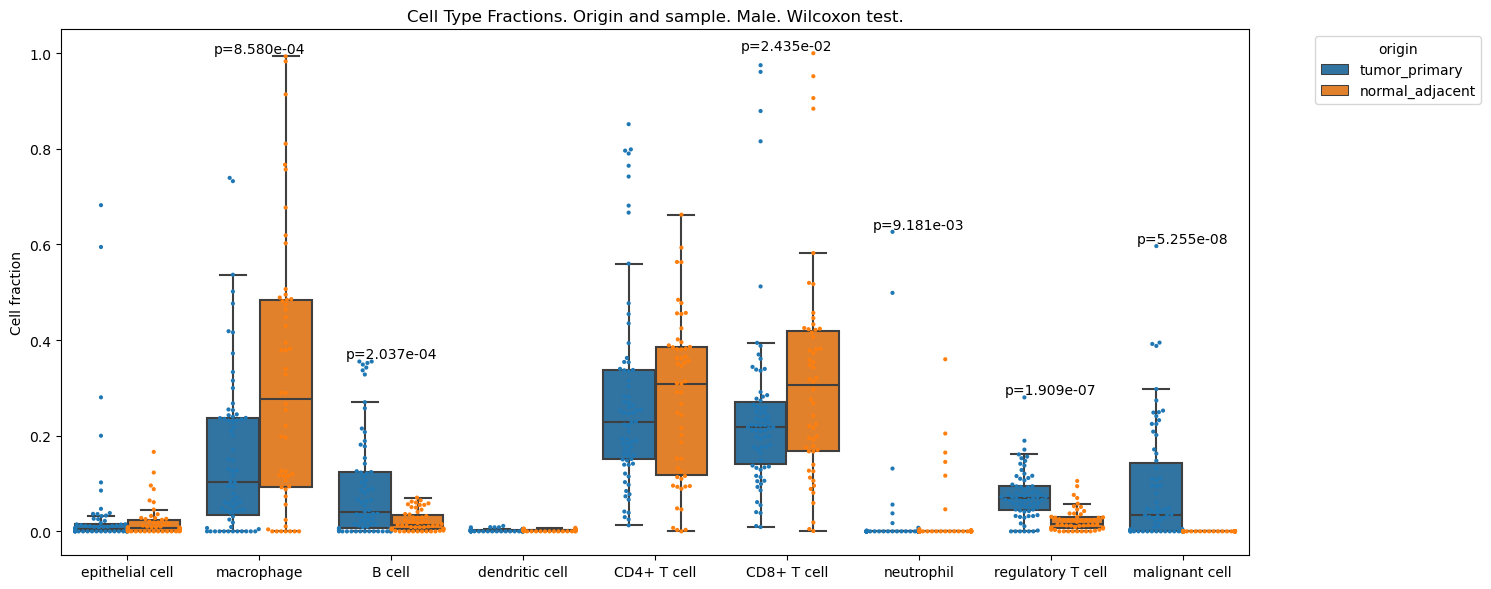

In [58]:
# Assuming 'sex', 'cell_type', and 'donor_id' are columns in your dataset (adata.obs in your case)
data = adata_male.obs[['origin', 'cell_type', 'sample']]

# Step 1: Calculate the cell type proportions for each sex and donor
total_cells_by_sex_donor = data.groupby(['origin', 'sample']).size()

cell_type_fractions = data.groupby(['origin', 'sample', 'cell_type']).size().reset_index(name='count')
cell_type_fractions['fraction'] = cell_type_fractions.apply(
    lambda row: row['count'] / total_cells_by_sex_donor[(row['origin'], row['sample'])], axis=1
)

# Step 2: Create the boxplot and swarmplot
plt.figure(figsize=(15, 6))

# Create the boxplot
boxplot = sns.boxplot(x='cell_type', y='fraction', hue='origin', data=cell_type_fractions, showfliers=False, hue_order=["tumor_primary", "normal_adjacent"])

# Overlay the swarmplot
swarmplot = sns.swarmplot(x='cell_type', y='fraction', hue='origin', data=cell_type_fractions, size=3, hue_order=["tumor_primary", "normal_adjacent"], dodge=True)

# Step 3: Perform Mann-Whitney U Test for significance and display p-values
significance_level = 0.05  

cell_types = cell_type_fractions['cell_type'].unique()


for cell_type in cell_types:
    male_fractions = cell_type_fractions[(cell_type_fractions['cell_type'] == cell_type) & (cell_type_fractions['origin'] == 'tumor_primary')]['fraction'].dropna()
    female_fractions = cell_type_fractions[(cell_type_fractions['cell_type'] == cell_type) & (cell_type_fractions['origin'] == 'normal_adjacent')]['fraction'].dropna()
          # Ensure the lengths are equal by truncating the longer list
    min_length = min(len(male_fractions), len(female_fractions))
    male_fractions = male_fractions[:min_length]
    female_fractions = female_fractions[:min_length]
    
    # Perform wilcoxon Test
    stat, p_value = wilcoxon(male_fractions, female_fractions)
    if p_value < significance_level:
        x_position = list(cell_types).index(cell_type)
        y_max = cell_type_fractions[cell_type_fractions['cell_type'] == cell_type]['fraction'].max()
        plt.text(x_position, y_max, f'p={p_value:.3e}', ha='center', va='bottom', color='black', fontsize=10)


# Step 4: Remove duplicate legends
handles, labels = boxplot.get_legend_handles_labels()
plt.legend().remove()

# Add a single legend using the collected handles and labels
plt.legend(handles=handles[:2], labels=labels[:2], title="origin", bbox_to_anchor=(1.05, 1), loc='upper left')

# Customize the plot
plt.xlabel('')
plt.ylabel('Cell fraction')
plt.title('Cell Type Fractions. Origin and sample. Male. Wilcoxon test.')

# Adjust layout
plt.tight_layout()


plt.savefig(f'{resDir}/stacked_barplot_swarm_willcoxon_male.png', bbox_inches='tight')

# Show the plot
plt.show()


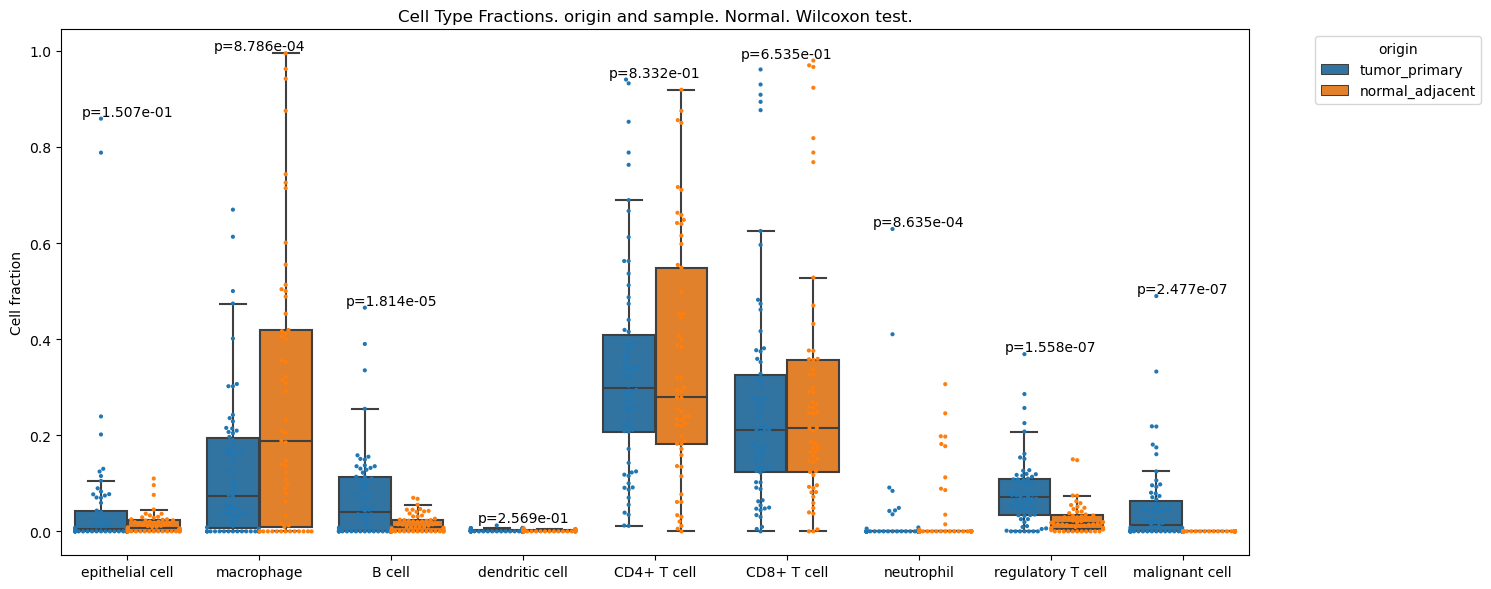

In [55]:
# Assuming 'sex', 'cell_type', and 'donor_id' are columns in your dataset (adata.obs in your case)
data = adata_female.obs[['origin', 'cell_type', 'sample']]

# Step 1: Calculate the cell type proportions for each sex and donor
total_cells_by_sex_donor = data.groupby(['origin', 'sample']).size()

cell_type_fractions = data.groupby(['origin', 'sample', 'cell_type']).size().reset_index(name='count')
cell_type_fractions['fraction'] = cell_type_fractions.apply(
    lambda row: row['count'] / total_cells_by_sex_donor[(row['origin'], row['sample'])], axis=1
)

# Step 2: Create the boxplot and swarmplot
plt.figure(figsize=(15, 6))

# Create the boxplot
boxplot = sns.boxplot(x='cell_type', y='fraction', hue='origin', data=cell_type_fractions, showfliers=False, hue_order=["tumor_primary", "normal_adjacent"])

# Overlay the swarmplot
swarmplot = sns.swarmplot(x='cell_type', y='fraction', hue='origin', data=cell_type_fractions, size=3, hue_order=["tumor_primary", "normal_adjacent"], dodge=True)

# Step 3: Perform Mann-Whitney U Test for significance and display p-values
significance_level = 0.05  

cell_types = cell_type_fractions['cell_type'].unique()


for cell_type in cell_types:
    male_fractions = cell_type_fractions[(cell_type_fractions['cell_type'] == cell_type) & (cell_type_fractions['origin'] == 'tumor_primary')]['fraction'].dropna()
    female_fractions = cell_type_fractions[(cell_type_fractions['cell_type'] == cell_type) & (cell_type_fractions['origin'] == 'normal_adjacent')]['fraction'].dropna()
          # Ensure the lengths are equal by truncating the longer list
    min_length = min(len(male_fractions), len(female_fractions))
    male_fractions = male_fractions[:min_length]
    female_fractions = female_fractions[:min_length]
    
    # Perform wilcoxon Test
    stat, p_value = wilcoxon(male_fractions, female_fractions)
    #if p_value < significance_level:
    x_position = list(cell_types).index(cell_type)
    y_max = cell_type_fractions[cell_type_fractions['cell_type'] == cell_type]['fraction'].max()
    plt.text(x_position, y_max, f'p={p_value:.3e}', ha='center', va='bottom', color='black', fontsize=10)


# Step 4: Remove duplicate legends
handles, labels = boxplot.get_legend_handles_labels()
plt.legend().remove()

# Add a single legend using the collected handles and labels
plt.legend(handles=handles[:2], labels=labels[:2], title="origin", bbox_to_anchor=(1.05, 1), loc='upper left')

# Customize the plot
plt.xlabel('')
plt.ylabel('Cell fraction')
plt.title('Cell Type Fractions. origin and sample. Male. Wilcoxon test.')

# Adjust layout
plt.tight_layout()


#plt.savefig(f'{resDir}/stacked_barplot_swarm_willcoxon_male.png', bbox_inches='tight')

# Show the plot
plt.show()


In [60]:
adata.obs.sex.value_counts()

female    233953
male      231521
Name: sex, dtype: int64